### Resultado Concurso Banco do Brasil - Agente de Tecnologia 2021

Pelo edital, as vagas disponibilzadas foram:

| AC  | PcD | PPP | Total |
| --- | --- | --- | ----- |
| 180 | 12  | 48  | 240   |

In [1]:
import numpy as np
import pandas as pd

In [2]:
# le arquivo com os dados
with open('resultado_agente_tecnologia_2021.txt', 'r') as f:
    lines = f.readlines()

print(lines[:5])
print('len lines:', len(lines))

['polo nome nascimento cpf inscrição l_port l_ing mat atu conh_bas prob c_ban tec conh_esp pontos class_ac class_pcd class_ppp situação_final\n', 'MACRORREGIÃO 10 - MICRORREGIÃO 16 ADELSON JHONATA SILVA DE SOUSA 30/09/1997 XXX.917.491-XX 01800352210 9,0 5,0 6,0 4,0 24,0 3,0 7,5 27,0 37,5 61,5 410 36 CLASSIFICADO\n', 'MACRORREGIÃO 10 - MICRORREGIÃO 16 ADERSON LUCAS MENDONCA E SILVA MEDEIROS 09/05/1985 XXX.494.124-XX 01800287469 10,5 5,0 7,5 5,0 28,0 6,0 6,0 24,0 36,0 64,0 312 CADASTRO-RESERVA\n', 'MACRORREGIÃO 10 - MICRORREGIÃO 16 ADRIANA DE FATIMA LOURENCON WATANABE 06/02/1981 XXX.251.678-XX 09700032960 12,0 3,0 7,5 4,0 26,5 4,5 4,5 33,0 42,0 68,5 151 CLASSIFICADO\n', 'MACRORREGIÃO 10 - MICRORREGIÃO 16 ADRIANO DUTRA DE DEUS FERREIRA 30/10/1989 XXX.432.111-XX 01800255982 13,5 3,0 7,5 4,0 28,0 4,5 6,0 28,5 39,0 67,0 203 CADASTRO-RESERVA\n']
len lines: 481


In [3]:
header = lines[0].upper().replace('\n', '').split(' ')

df = pd.DataFrame(columns=header[:16] + ['CLASS_PCD_PPP'] + [header[-1]],
                  index=range(len(lines[1:])))

for i, line in enumerate(lines[1:]):
    
    line = line.lower()
    
    string = line.replace('\n', '')
    polo = string[:(line.find('16') + 3)]        # filtra o polo

    string2 = string[(line.find('16') + 3):]      
    nome = string2[:(string2.find('/') - 2)]     # filtra o nome

    string3 = string2[(string2.find('/') -2):]
    
    # confere se é PCD ou PPP
    if len(string3.split(' ')) <= 15:
        df.loc[i, 'CLASS_PCD_PPP'] = 'Nao'
        
    else:
        df.loc[i, 'CLASS_PCD_PPP'] = 'Sim'
    
    df.loc[i,'POLO'] = polo.capitalize()
    df.loc[i,'NOME'] = nome.capitalize()
    df.loc[i,'NASCIMENTO':'CLASS_AC'] = string3.split(' ')[:14]
    df.loc[i, 'SITUAÇÃO_FINAL'] = string3.split(' ')[-1]

# Trata colunas numericas
num_col = ['L_PORT', 'L_ING', 'MAT', 'ATU', 'CONH_BAS', 'PROB', 'C_BAN', 'TEC', 'CONH_ESP', 'PONTOS', 'CLASS_AC']

for col in num_col:
    df[col] = df[col].str.replace(',', '.').astype(np.float64)

df['SITUAÇÃO_FINAL'] = df['SITUAÇÃO_FINAL'].str.capitalize()
df['NASCIMENTO'] = pd.to_datetime(df['NASCIMENTO'], format="%d/%m/%Y", dayfirst=True)


In [8]:
df.head(3)

,POLO,NOME,NASCIMENTO,CPF,INSCRIÇÃO,L_PORT,L_ING,MAT,ATU,CONH_BAS,PROB,C_BAN,TEC,CONH_ESP,PONTOS,CLASS_AC,CLASS_PCD_PPP,SITUAÇÃO_FINAL
0,Macrorregião 10 - microrregião 16,Adelson jhonata silva de sousa,1997-09-30,xxx.917.491-xx,01800352210,9.0,5.0,6.0,4.0,24.0,3.0,7.5,27.0,37.5,61.5,410.0,Sim,Classificado
1,Macrorregião 10 - microrregião 16,Aderson lucas mendonca e silva medeiros,1985-05-09,xxx.494.124-xx,01800287469,10.5,5.0,7.5,5.0,28.0,6.0,6.0,24.0,36.0,64.0,312.0,Nao,Cadastro-reserva
2,Macrorregião 10 - microrregião 16,Adriana de fatima lourencon watanabe,1981-02-06,xxx.251.678-xx,09700032960,12.0,3.0,7.5,4.0,26.5,4.5,4.5,33.0,42.0,68.5,151.0,Nao,Classificado


In [5]:
# numero de classificados e cadastro-reserva
df['SITUAÇÃO_FINAL'].value_counts()

Classificado        240
Cadastro-reserva    240
Name: SITUAÇÃO_FINAL, dtype: int64

In [6]:
df['CLASS_PCD_PPP'].value_counts()

Nao    420
Sim     60
Name: CLASS_PCD_PPP, dtype: int64

In [10]:
# separa em classificados e cadastro reserva e filtra por ampla concorrencia apenas
classificados_ac = df.loc[(df['SITUAÇÃO_FINAL'] == 'Classificado') & (df.CLASS_PCD_PPP == 'Nao')]
cad_reserva = df.loc[(df['SITUAÇÃO_FINAL'] == 'Cadastro-reserva') & (df.CLASS_PCD_PPP == 'Nao')]


In [20]:
print('Nota de corte (pontos): ', classificados_ac['PONTOS'].min())
classificados_ac.sort_values('PONTOS', ascending=True).drop('POLO', axis=1).head(3)

Nota de corte (pontos):  67.5


,NOME,NASCIMENTO,CPF,INSCRIÇÃO,L_PORT,L_ING,MAT,ATU,CONH_BAS,PROB,C_BAN,TEC,CONH_ESP,PONTOS,CLASS_AC,CLASS_PCD_PPP,SITUAÇÃO_FINAL
138,Felipe yuri inoue,1992-08-17,xxx.933.188-xx,01800701478,12.0,5.0,7.5,4.0,28.5,3.0,6.0,30.0,39.0,67.5,185.0,Nao,Classificado
470,Wallas ferreira de morais,1983-08-09,xxx.261.106-xx,01800686363,15.0,5.0,3.0,4.0,27.0,4.5,7.5,28.5,40.5,67.5,183.0,Nao,Classificado
467,Vitor de araujo vieira,1993-10-04,xxx.093.481-xx,01800924922,7.5,4.0,6.0,5.0,22.5,4.5,6.0,34.5,45.0,67.5,182.0,Nao,Classificado


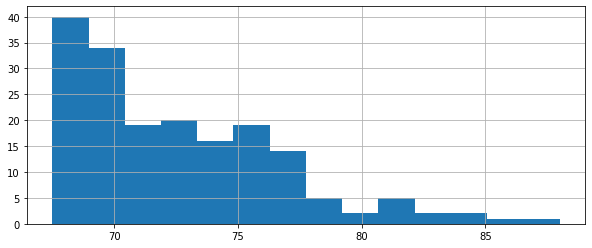

In [43]:
classificados_ac['PONTOS'].hist(bins=14, figsize=(10,4));